In [266]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

import networkx as nx

from scipy.cluster.hierarchy import dendrogram, linkage

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook

In [281]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)

    def forward(self, x):
        x= self.fc1(x)
        x = F.relu(x)
        o2 = self.fc2(x)
        a2 = F.relu(o2)
        out = self.fc3(a2)
        return [out, a2, o2]
    
def plot_hyperplane(a1, a2, b, x_min, x_max, label, color):
    plt.plot([x_min, x_max], [ - (a1 * x_min + b) / a2, - (a1 * x_max + b) / a2], color=color, label=label)
    
def draw_hyperplanes(layers):
    for layer in range(len(layers)):
        color = (np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1))
        for unit in range(layers[0].weight.data.size(0)):
            if layer == 0:
                a1 = layers[0].weight.data[unit,0]
                a2 = layers[0].weight.data[unit,1]
                b = layers[0].bias.data[unit]
                plot_hyperplane(a1, a2, b, -1, 1, 'Layer %d Unit %d' % (layer, unit), color)
            else:
                for previous_layer in range(len(layers) - layer - 1, -1, -1):
                    print(previous_layer)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.title('Hyperplanes')
    plt.legend()
    plt.show()
    
model = Net()
model.cuda()

print(model)

Net (
  (fc1): Linear (2 -> 10)
  (fc2): Linear (10 -> 10)
  (fc3): Linear (10 -> 3)
)


<IPython.core.display.Javascript object>


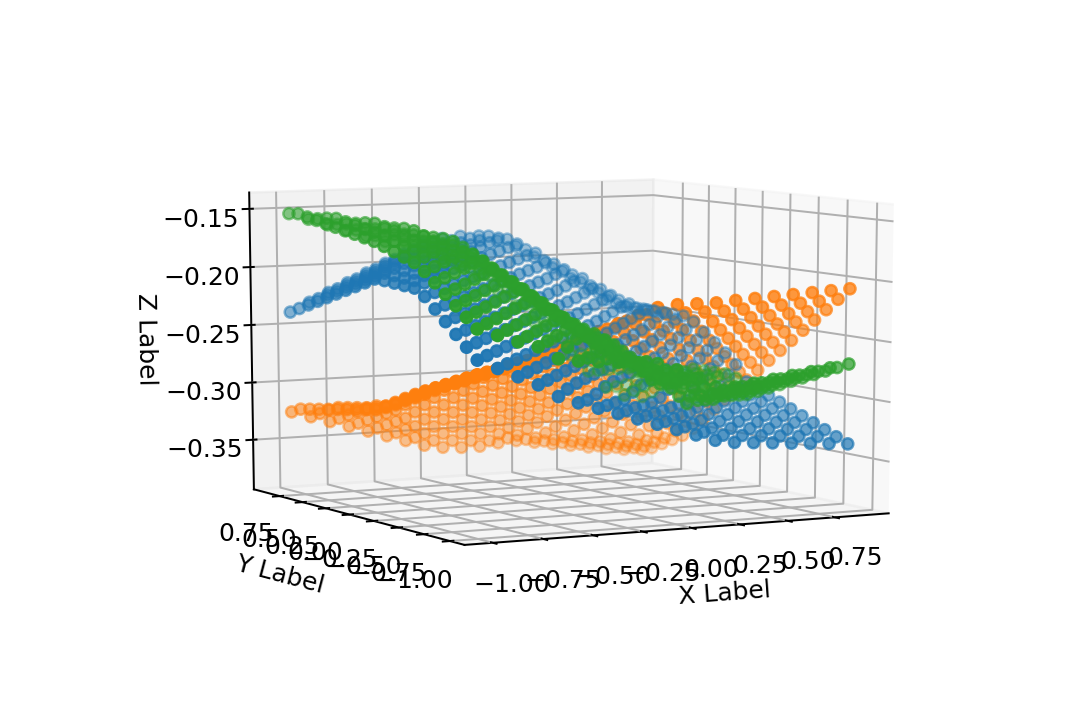

In [285]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

X = np.arange(-1, 1, 0.1)
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)

XY = np.concatenate([X.reshape(X.shape[0], X.shape[1], 1), Y.reshape(Y.shape[0], Y.shape[1], 1)], axis=2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

input = Variable(torch.from_numpy(XY.reshape(X.shape[0] * X.shape[1], 2)).float()).cuda()

for i in range(3):
    Z = model(input)[0][:,i].data.cpu().numpy().reshape(X.shape[0], Y.shape[0])
    ax.scatter(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()